In [2]:
from utils.wandb_utils import get_df, get_last_result, get_es_result

df = get_df("anthony-wss/new-noiseless")
clcifar_df = get_df('anthony-wss/Seed-2')

In [3]:
clcifar10_result = {algo:{'last': [], 'es': []} for algo in ['ure-ga-u', 'fwd-u', 'ure-ga-r', 'fwd-r', 'scl-exp', 'scl-nl', 'l-w', 'l-uw', 'pc-sigmoid']}
clcifar20_result = {algo:{'last': [], 'es': []} for algo in ['ure-ga-u', 'fwd-u', 'ure-ga-r', 'fwd-r', 'scl-exp', 'scl-nl', 'l-w', 'l-uw', 'pc-sigmoid']}

for algo in ['ure-ga-u', 'fwd-u', 'ure-ga-r', 'fwd-r', 'scl-exp', 'scl-nl', 'l-w', 'l-uw', 'pc-sigmoid']:
    sub_df = clcifar_df[(clcifar_df['algo'] == algo) & (clcifar_df['dataset_name'] == 'clcifar10')]
    clcifar10_result[algo]['last'].append(get_last_result(sub_df))
    clcifar10_result[algo]['es'].append(get_es_result(sub_df))

    sub_df = clcifar_df[(clcifar_df['algo'] == algo) & (clcifar_df['dataset_name'] == 'clcifar20')]
    clcifar20_result[algo]['last'].append(get_last_result(sub_df))
    clcifar20_result[algo]['es'].append(get_es_result(sub_df))

In [4]:
for algo in ['ure-ga-u', 'fwd-u', 'ure-ga-r', 'fwd-r', 'scl-exp', 'scl-nl', 'l-w', 'l-uw', 'pc-sigmoid']:
    for data_cleaning_rate in [0.25, 0.5, 0.75, 1]:
        sub_df = df[(df['algo'] == algo) & (df['dataset_name'] == 'clcifar10-noiseless') & (df['data_cleaning_rate'] == data_cleaning_rate)]
        clcifar10_result[algo]['last'].append(get_last_result(sub_df))
        clcifar10_result[algo]['es'].append(get_es_result(sub_df))

        sub_df = df[(df['algo'] == algo) & (df['dataset_name'] == 'clcifar20-noiseless') & (df['data_cleaning_rate'] == data_cleaning_rate)]
        clcifar20_result[algo]['last'].append(get_last_result(sub_df))
        clcifar20_result[algo]['es'].append(get_es_result(sub_df))

In [5]:
clcifar20_result

{'ure-ga-u': {'last': [7.77, 8.57, 9.26, 9.4, 12.06],
  'es': [10.18, 11.03, 12.65, 13.28, 14.49]},
 'fwd-u': {'last': [7.76, 8.64, 9.46, 10.41, 10.9],
  'es': [8.69, 8.65, 10.31, 10.95, 10.6]},
 'ure-ga-r': {'last': [5.47, 14.85, 15.94, 16.42, 16.6],
  'es': [5.73, 14.98, 16.81, 16.41, 18.55]},
 'fwd-r': {'last': [16.29, 16.64, 18.02, 18.27, 19.24],
  'es': [20.59, 21.26, 21.96, 23.77, 24.9]},
 'scl-exp': {'last': [7.61, 8.64, 9.49, 10.84, 10.47],
  'es': [8.03, 8.4, 10.69, 11.6, 10.74]},
 'scl-nl': {'last': [8.04, 8.59, 9.66, 10.46, 10.75],
  'es': [8.44, 8.41, 10.16, 10.99, 11.18]},
 'l-w': {'last': [6.96, 7.43, 8.29, 8.61, 8.9],
  'es': [8.91, 9.36, 10.71, 11.39, 11.2]},
 'l-uw': {'last': [7.71, 8.45, 8.33, 9.17, 9.52],
  'es': [8.85, 8.99, 10.7, 11.57, 11.42]},
 'pc-sigmoid': {'last': [9.53, 9.56, 9.58, 9.59, 11.88],
  'es': [13.53, 16.34, 17.02, 17.59, 19.12]}}

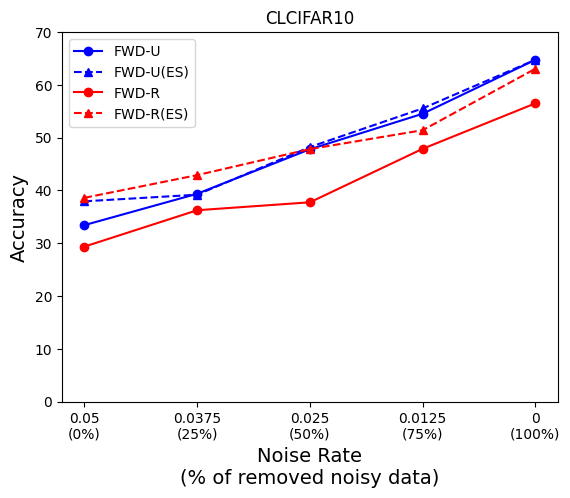

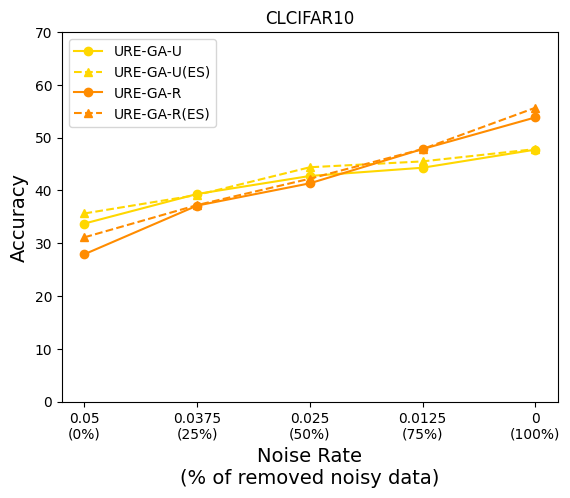

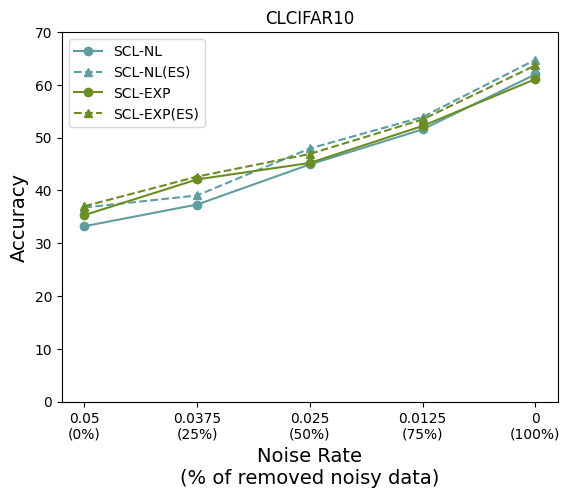

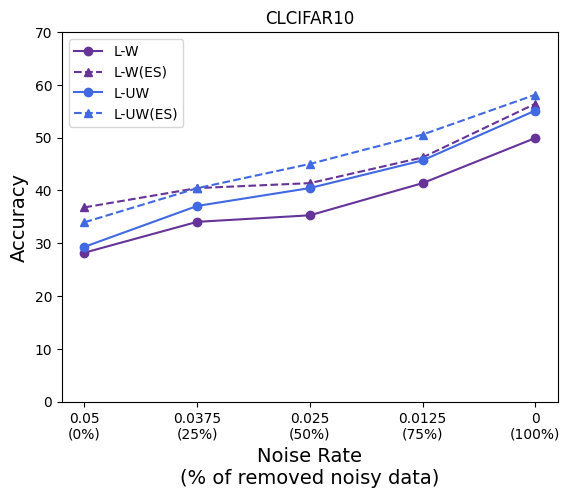

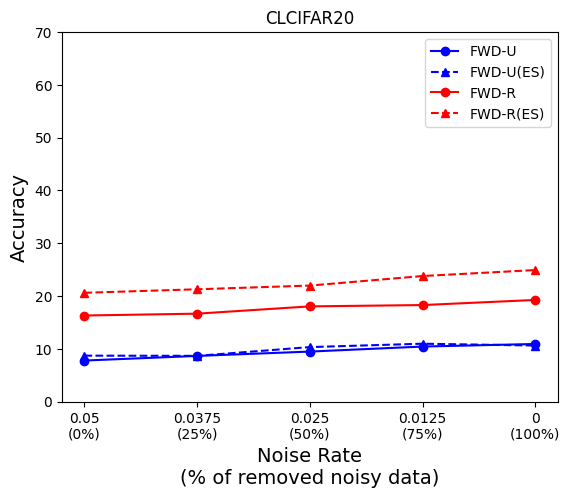

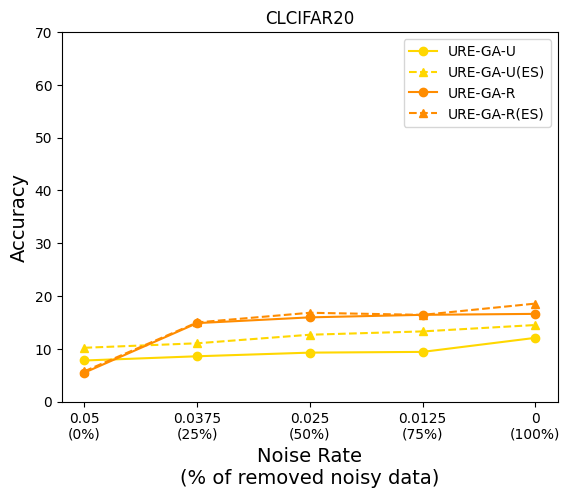

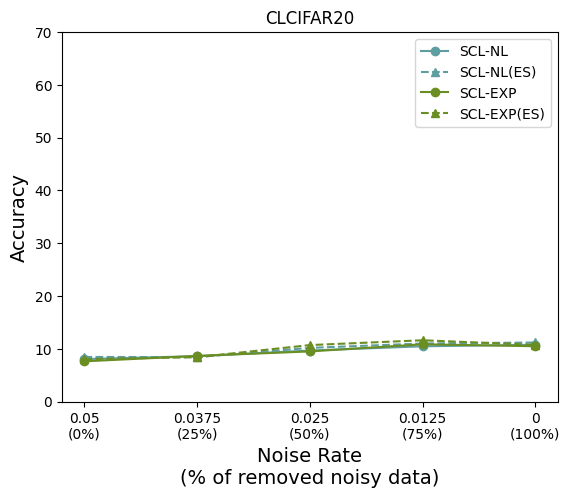

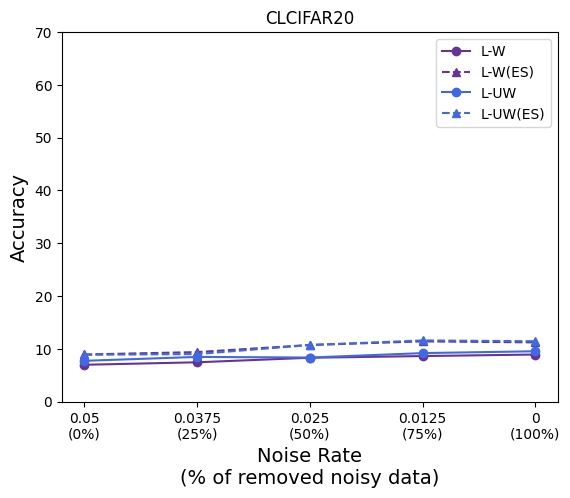

In [28]:
import matplotlib.pyplot as plt

def plot_datacleaning(dataset_name, algo1, color1, algo2, color2):
    if dataset_name == 'clcifar10':
        df = clcifar10_result
    else:
        df = clcifar20_result

    # Create the plot
    fig, ax = plt.subplots()
    ax.plot(df[algo1]['last'], linestyle='solid', marker='o', color=color1, label=algo1.upper())
    ax.plot(df[algo1]['es'], linestyle='--', marker='^', color=color1, label=algo1.upper()+'(ES)')
    ax.plot(df[algo2]['last'], linestyle='solid', marker='o', color=color2, label=algo2.upper())
    ax.plot(df[algo2]['es'], linestyle='--', marker='^', color=color2, label=algo2.upper()+'(ES)')
    # ax.axhline(y=uniform_clcifar10_fwd, color='tomato', label='uniform CL')

    xticks = ["0.05\n(0%)", "0.0375\n(25%)", "0.025\n(50%)", "0.0125\n(75%)", "0\n(100%)"]
    # ax.fill_between(xticks, fwd_u, fwd_u_es, where=fwd_u_es>=fwd_u, interpolate=True, color='gray', alpha=0.3)
    # ax.fill_between(xticks, y1, y2, where=y2<y1, interpolate=True, color='green', alpha=0.3)

    # Add labels and legend
    ax.set_xlabel('Noise Rate\n(% of removed noisy data)', fontsize=14)

    ax.set_xticks(range(5))
    ax.set_xticklabels(xticks)

    yticks = list(range(0, 71, 10))
    ax.set_yticks(yticks)

    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_title(dataset_name.upper())
    ax.legend()

    plt.savefig(f"./graph/{algo1}-{algo2}-{dataset_name}.png", bbox_inches='tight')

plot_datacleaning('clcifar10', 'fwd-u', 'blue', 'fwd-r', 'red')
plot_datacleaning('clcifar10', 'ure-ga-u', 'gold', 'ure-ga-r', 'darkorange')
plot_datacleaning('clcifar10', 'scl-nl', 'cadetblue', 'scl-exp', 'olivedrab')
plot_datacleaning('clcifar10', 'l-w', 'rebeccapurple', 'l-uw', 'royalblue')
plot_datacleaning('clcifar20', 'fwd-u', 'blue', 'fwd-r', 'red')
plot_datacleaning('clcifar20', 'ure-ga-u', 'gold', 'ure-ga-r', 'darkorange')
plot_datacleaning('clcifar20', 'scl-nl', 'cadetblue', 'scl-exp', 'olivedrab')
plot_datacleaning('clcifar20', 'l-w', 'rebeccapurple', 'l-uw', 'royalblue')

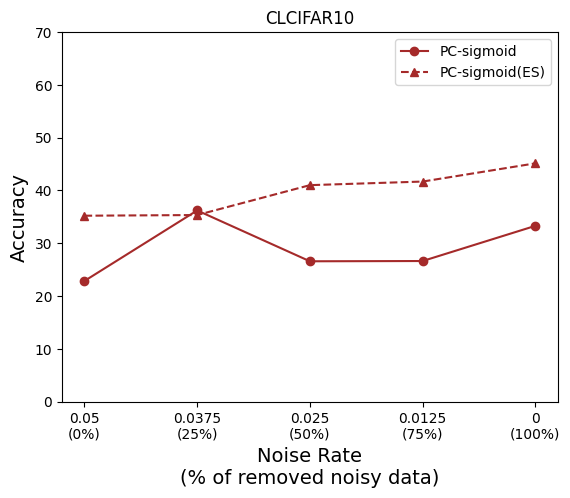

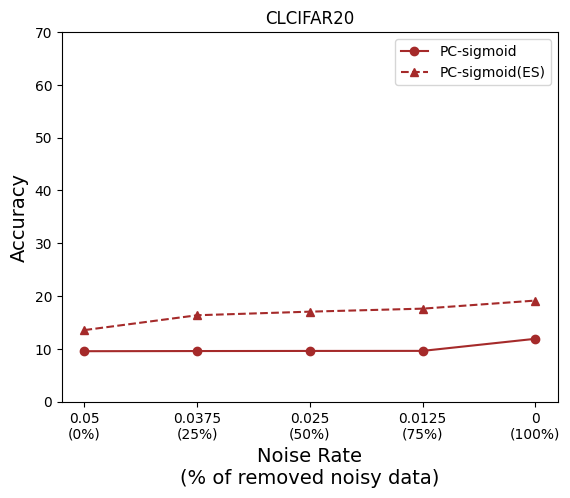

In [29]:
for dataset_name in ['clcifar10', 'clcifar20']:

    if dataset_name == 'clcifar10':
        df = clcifar10_result
    else:
        df = clcifar20_result

    # Create the plot
    fig, ax = plt.subplots()
    ax.plot(df['pc-sigmoid']['last'], linestyle='solid', marker='o', color='brown', label='PC-sigmoid')
    ax.plot(df['pc-sigmoid']['es'], linestyle='--', marker='^', color='brown', label='PC-sigmoid(ES)')
    # ax.axhline(y=uniform_clcifar10_fwd, color='tomato', label='uniform CL')

    xticks = ["0.05\n(0%)", "0.0375\n(25%)", "0.025\n(50%)", "0.0125\n(75%)", "0\n(100%)"]
    # ax.fill_between(xticks, fwd_u, fwd_u_es, where=fwd_u_es>=fwd_u, interpolate=True, color='gray', alpha=0.3)
    # ax.fill_between(xticks, y1, y2, where=y2<y1, interpolate=True, color='green', alpha=0.3)

    # Add labels and legend
    ax.set_xlabel('Noise Rate\n(% of removed noisy data)', fontsize=14)

    ax.set_xticks(range(5))
    ax.set_xticklabels(xticks)

    yticks = list(range(0, 71, 10))
    ax.set_yticks(yticks)

    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_title('CLCIFAR' + dataset_name[-2:])
    ax.legend()

    plt.savefig(f"./graph/pc-sigmoid-{dataset_name}.png", bbox_inches='tight')